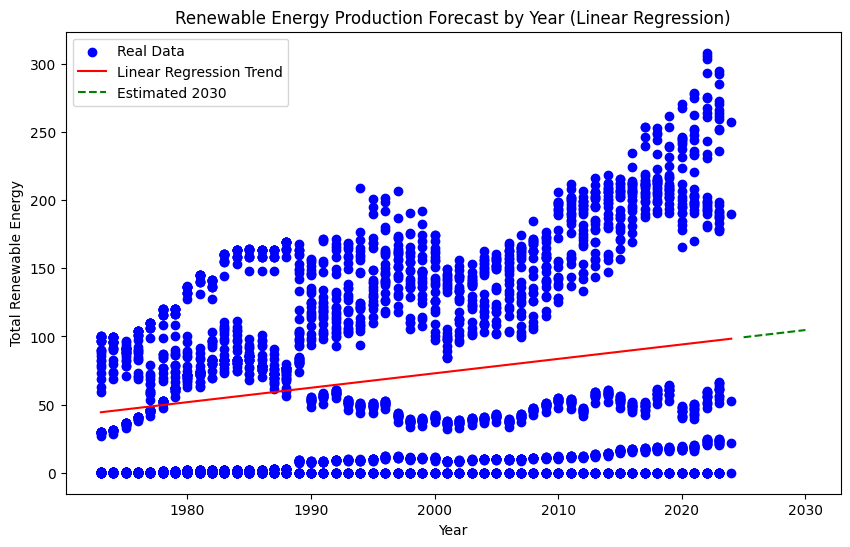

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_path = os.path.join(project_root, "data", "renewable_energy.csv")

data = pd.read_csv(file_path, sep=',')

X = data[['Year']]
y = data['Total Renewable Energy']

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({'Year': np.arange(data['Year'].max() + 1, 2031)})
future_predictions = model.predict(future_years)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Real Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Trend')
plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Estimated 2030')
plt.xlabel("Year")
plt.ylabel("Total Renewable Energy")
plt.title("Renewable Energy Production Forecast by Year (Linear Regression)")
plt.legend()
plt.show()

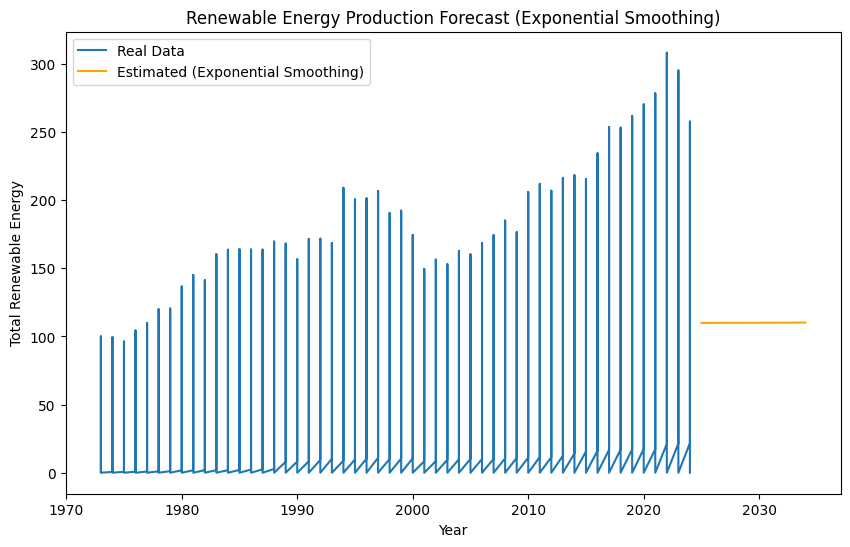

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data['Total Renewable Energy'], trend='add', seasonal=None)
fit = model.fit()

forecast = fit.forecast(steps=10)

plt.figure(figsize=(10,6))
plt.plot(data['Year'], data['Total Renewable Energy'], label='Real Data')
plt.plot(range(data['Year'].max()+1, data['Year'].max()+11), forecast, color='orange', label='Estimated (Exponential Smoothing)')
plt.title("Renewable Energy Production Forecast (Exponential Smoothing)")
plt.xlabel("Year")
plt.ylabel("Total Renewable Energy")
plt.legend()
plt.show()